In [2]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup

In [1]:
import pandas as pd
import numpy as np 
import re
import seaborn as sns
import matplotlib.pyplot as plt 
import string 
import warnings 
import nltk
warnings.filterwarnings('ignore')

In [4]:
url='https://www.amazon.in/Vega-CRX-B-M-Flip-up-Helmet-Black/product-reviews/B012DF4EUQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [5]:
def getdata(url):
    r = requests.get(url)
    return r.text

def html_code(url):
    html=getdata(url)
    soup=BeautifulSoup(html,'html.parser')

    return soup

soup=html_code(url)
print(soup)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<!-- sp:end-feature:csm:head-open-

In [6]:
import nltk
with open("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/NLP/negative-words.txt",'r',encoding='latin-1') as file:
    negative = set(line.strip() for line in file)

In [7]:

with open("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/NLP/positive-words.txt",'r',encoding='latin') as file:
    positive=set(line.strip() for line in file)

In [8]:
with open ("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/NLP/stop.txt",'r',encoding='latin') as file:
    stop=set(line.strip() for line in file)

In [9]:
from nltk.stem import PorterStemmer

In [26]:
def cus_name(soup):
    data=" "
    cus=[]

    for item in soup.find_all("span",class_='a-profile-name'):
        data=data+item.get_text()
        cus.append(data)
        data=" "
    return cus

cus_=cus_name(soup)
print(cus_)

[' Satyam kumar', ' Sanjay', ' Satyam kumar', ' Krish', ' Mo.said', ' RR', ' Placeholder', ' Sanjay', ' Sanjay', ' Anurag Prjapati', ' Anurag Prjapati', ' Reyan khan', ' Vasant Kumar. S', ' Krishna', ' Krishna']


In [42]:
def rev(soup):
    data=" "

    for item in soup.find_all("span",class_="a-size-base review-text review-text-content"):
        data=data+item.get_text()
    
    result=data.split('\n')
    return result

rev_dta=rev(soup)
rev_result=[]

for i in rev_dta:
    if i == '':
        pass
    else:
        rev_result.append(i)

print(rev_result)


[' ', 'Product is nice and very reasonable to rate.', 'Using the same model helmet from 2016. It is durable and solid. Shape also good. Recently missed the helmet and ordered it. The quality and finish is same as before. Great product from Vega', 'Very good quality', 'Good product for the price. As a warranty also.I have a ntorq, this helmet doesn’t fit under the sit,And also check ur head size before buying', "I returned it as I didn't feel comfortable in flip helmet .", 'Product low quality', '                    The media could not be loaded.', '                ', '\xa0Very nice product 👍 value for money... Fitting is good... light weight & very comfortable @ good performance', 'Love it .Simple and casual.', 'Quality.weight less', 'Good helmet size correct fit']


In [43]:
cur_res =cus_[:len(rev_result)]

data ={"name":cur_res,
       "Review":rev_result}

df = pd.DataFrame(data)

df.to_csv("amazon_review.csv")

In [45]:
data = pd.read_csv("amazon_review.csv")
data

,Unnamed: 0,name,Review
0,0,Satyam kumar,
1,1,Sanjay,Product is nice and very reasonable to rate.
2,2,Satyam kumar,Using the same model helmet from 2016. It is d...
3,3,Krish,Very good quality
4,4,Mo.said,Good product for the price. As a warranty also...
5,5,RR,I returned it as I didn't feel comfortable in ...
6,6,Placeholder,Product low quality
7,7,Sanjay,The media could not be loa...
8,8,Sanjay,
9,9,Anurag Prjapati,Very nice product 👍 value for money... Fittin...


In [46]:
data.rename(columns={'Unnamed: 0': 'Users'})

,Users,name,Review
0,0,Satyam kumar,
1,1,Sanjay,Product is nice and very reasonable to rate.
2,2,Satyam kumar,Using the same model helmet from 2016. It is d...
3,3,Krish,Very good quality
4,4,Mo.said,Good product for the price. As a warranty also...
5,5,RR,I returned it as I didn't feel comfortable in ...
6,6,Placeholder,Product low quality
7,7,Sanjay,The media could not be loa...
8,8,Sanjay,
9,9,Anurag Prjapati,Very nice product 👍 value for money... Fittin...


In [47]:
ps=PorterStemmer()

In [48]:
def preprocessing(x):
    x=re.sub('[^A-Za-z]'," ",x)
    x=[ps.stem(word) for word in x.split()]
    x=" ".join(x)
    positive_word=sum(1 for word in x if word is positive)
    negative_word=sum(1 for word in x if word is negative)
    return x


data["Review"]=data["Review"].apply(preprocessing)
data


,Unnamed: 0,name,Review
0,0,Satyam kumar,
1,1,Sanjay,product is nice and veri reason to rate
2,2,Satyam kumar,use the same model helmet from it is durabl an...
3,3,Krish,veri good qualiti
4,4,Mo.said,good product for the price as a warranti also ...
5,5,RR,i return it as i didn t feel comfort in flip h...
6,6,Placeholder,product low qualiti
7,7,Sanjay,the media could not be load
8,8,Sanjay,
9,9,Anurag Prjapati,veri nice product valu for money fit is good l...


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()


In [50]:
x=cv.fit_transform(data["Review"]).toarray()
x=pd.DataFrame(x, columns=cv.get_feature_names_out())

In [51]:
from textblob import TextBlob

In [52]:
data['sentiment_score'] = data['Review'].apply(lambda text:TextBlob(text).sentiment.polarity)
data.head()

,Unnamed: 0,name,Review,sentiment_score
0,0,Satyam kumar,,0.00
1,1,Sanjay,product is nice and veri reason to rate,0.60
2,2,Satyam kumar,use the same model helmet from it is durabl an...,0.25
3,3,Krish,veri good qualiti,0.70
4,4,Mo.said,good product for the price as a warranti also ...,0.55


<Axes: xlabel='sentiment_score', ylabel='Density'>

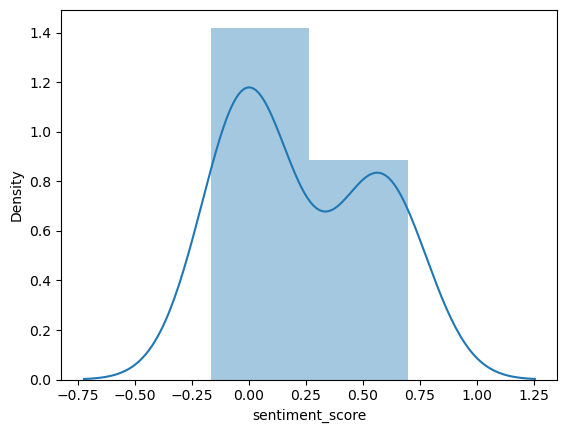

In [53]:
sns.distplot(data['sentiment_score'])

In [54]:
from wordcloud import WordCloud

In [55]:
all=" ".join(data['Review'])

In [56]:
word=WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color="black").generate(all)


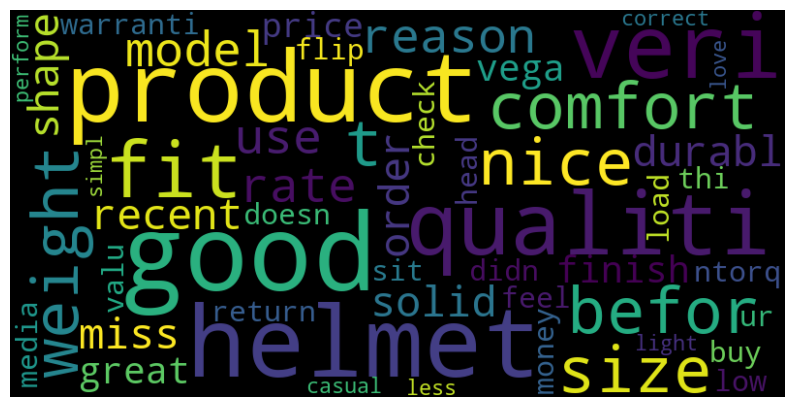

In [57]:
plt.figure(figsize=(10,7))
plt.imshow(word,interpolation="bilinear")
plt.axis('off')
plt.show()